## Icecream questionaire (WIP)

In [4]:

import pandas as pd
import numpy as np
from pandas import plotting

import matplotlib.pyplot as plt
%matplotlib inline

import urllib.request

In [144]:
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/icecream_chosa.txt'

urllib.request.urlretrieve(url, 'Icecream.txt')

df = pd.read_csv('Icecream.txt', sep=' ', index_col=0)
df.shape

(80, 25)

### Definition

array([[<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'birth_order'}>,
        <Axes: title={'center': 'frequency'}>,
        <Axes: title={'center': 'vanilla'}>],
       [<Axes: title={'center': 'strawberry'}>,
        <Axes: title={'center': 'milk_tea'}>,
        <Axes: title={'center': 'macadamia_nuts'}>,
        <Axes: title={'center': 'cookie'}>,
        <Axes: title={'center': 'chocolate'}>],
       [<Axes: title={'center': 'melon'}>,
        <Axes: title={'center': 'coffee'}>,
        <Axes: title={'center': 'almond'}>,
        <Axes: title={'center': 'rum_raisin'}>,
        <Axes: title={'center': 'mint'}>],
       [<Axes: title={'center': 'banana'}>,
        <Axes: title={'center': 'caramel'}>,
        <Axes: title={'center': 'walnut'}>,
        <Axes: title={'center': 'cassis'}>,
        <Axes: title={'center': 'chocolate_chips'}>],
       [<Axes: title={'center': 'orange'}>,
        <Axes: title={'center': 'green

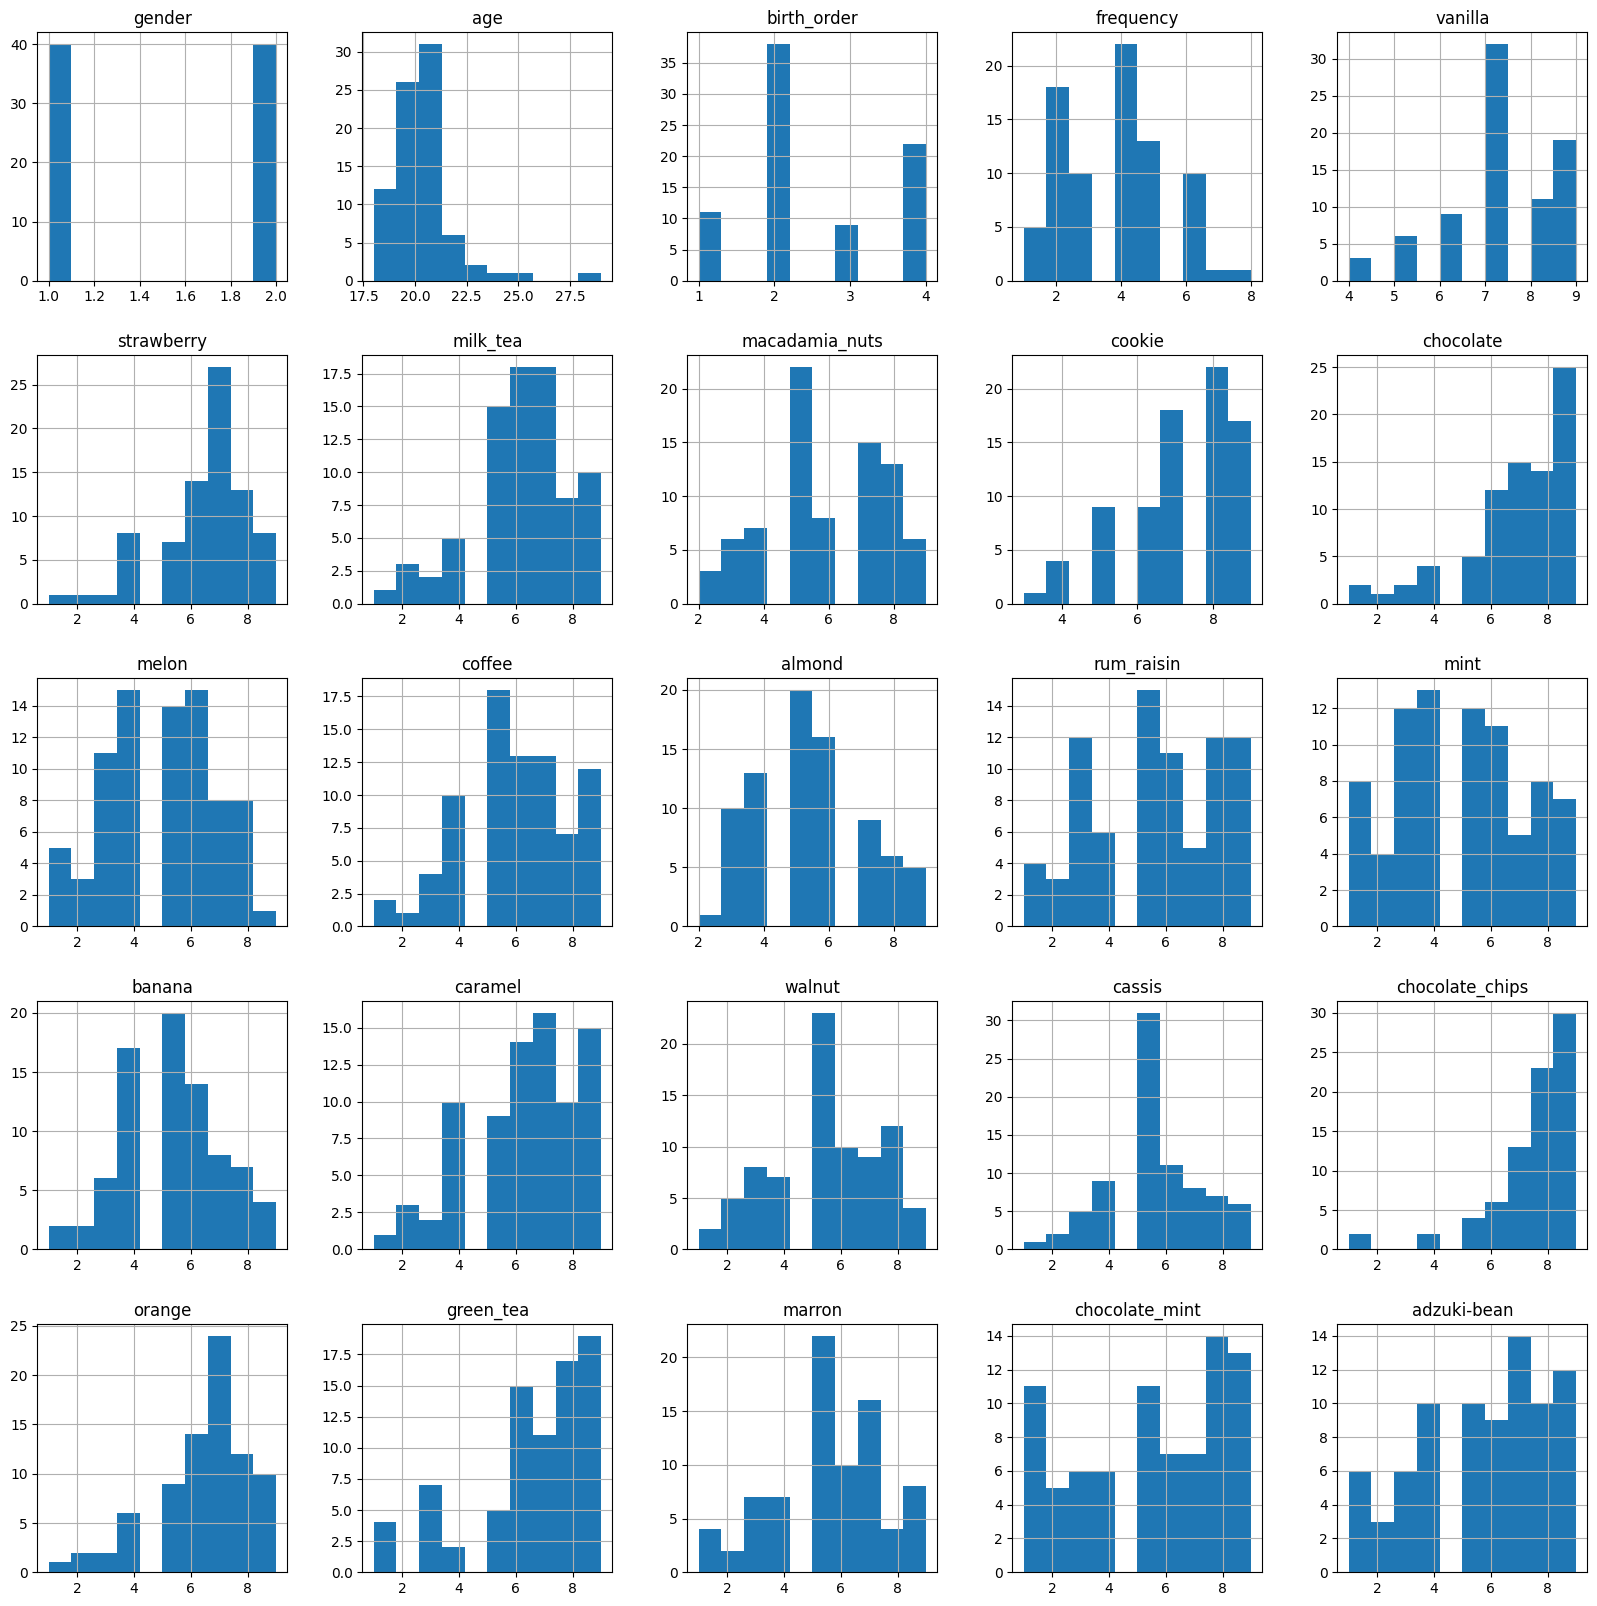

In [13]:
# Draw histgrams.

df.dropna(axis=1).hist(figsize=(20,20))

In [15]:
df[df['gender'] == 1].head()

,gender,age,birth_order,frequency,vanilla,strawberry,milk_tea,macadamia_nuts,cookie,chocolate,melon,coffee,almond,rum_raisin,mint,banana,caramel,walnut,cassis,chocolate_chips,orange,green_tea,marron,chocolate_mint,adzuki-bean
ID,,,,,,,,,,,,,,,,,,,,,,,,,
41,1,19,2,2,9,7,5,5,7,7,7,5,5,3,5,6,6,5,5,7,6,6,5,5,4
42,1,19,4,4,9,9,5,5,5,7,2,4,5,9,8,1,4,1,1,9,7,6,3,7,1
43,1,20,3,5,9,6,6,8,7,1,3,3,3,8,3,2,2,2,2,1,1,9,8,1,6
44,1,19,4,1,6,6,4,4,3,5,1,5,4,5,5,5,5,4,6,5,7,5,5,5,2
45,1,20,2,6,7,7,6,8,5,6,9,2,2,5,5,4,7,9,8,6,9,9,9,9,9


In [16]:
df[df['gender'] == 2].head()

,gender,age,birth_order,frequency,vanilla,strawberry,milk_tea,macadamia_nuts,cookie,chocolate,melon,coffee,almond,rum_raisin,mint,banana,caramel,walnut,cassis,chocolate_chips,orange,green_tea,marron,chocolate_mint,adzuki-bean
ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,2,20,2,5,7,7,8,3,9,9,6,8,3,2,1,7,9,3,3,9,7,8,8,1,7
2,2,21,2,1,7,8,9,9,9,9,2,7,7,9,5,4,7,8,9,9,4,7,7,8,9
3,2,21,3,2,7,4,3,3,6,4,7,7,6,3,3,4,6,3,3,6,7,3,7,3,3
4,2,21,4,3,9,6,6,5,8,6,8,9,6,5,4,4,9,5,4,8,9,1,2,1,3
5,2,21,4,2,9,5,7,5,6,8,4,4,4,6,9,6,6,6,5,9,6,6,6,9,1


array([[<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'birth_order'}>,
        <Axes: title={'center': 'frequency'}>,
        <Axes: title={'center': 'vanilla'}>],
       [<Axes: title={'center': 'strawberry'}>,
        <Axes: title={'center': 'milk_tea'}>,
        <Axes: title={'center': 'macadamia_nuts'}>,
        <Axes: title={'center': 'cookie'}>,
        <Axes: title={'center': 'chocolate'}>],
       [<Axes: title={'center': 'melon'}>,
        <Axes: title={'center': 'coffee'}>,
        <Axes: title={'center': 'almond'}>,
        <Axes: title={'center': 'rum_raisin'}>,
        <Axes: title={'center': 'mint'}>],
       [<Axes: title={'center': 'banana'}>,
        <Axes: title={'center': 'caramel'}>,
        <Axes: title={'center': 'walnut'}>,
        <Axes: title={'center': 'cassis'}>,
        <Axes: title={'center': 'chocolate_chips'}>],
       [<Axes: title={'center': 'orange'}>,
        <Axes: title={'center': 'green

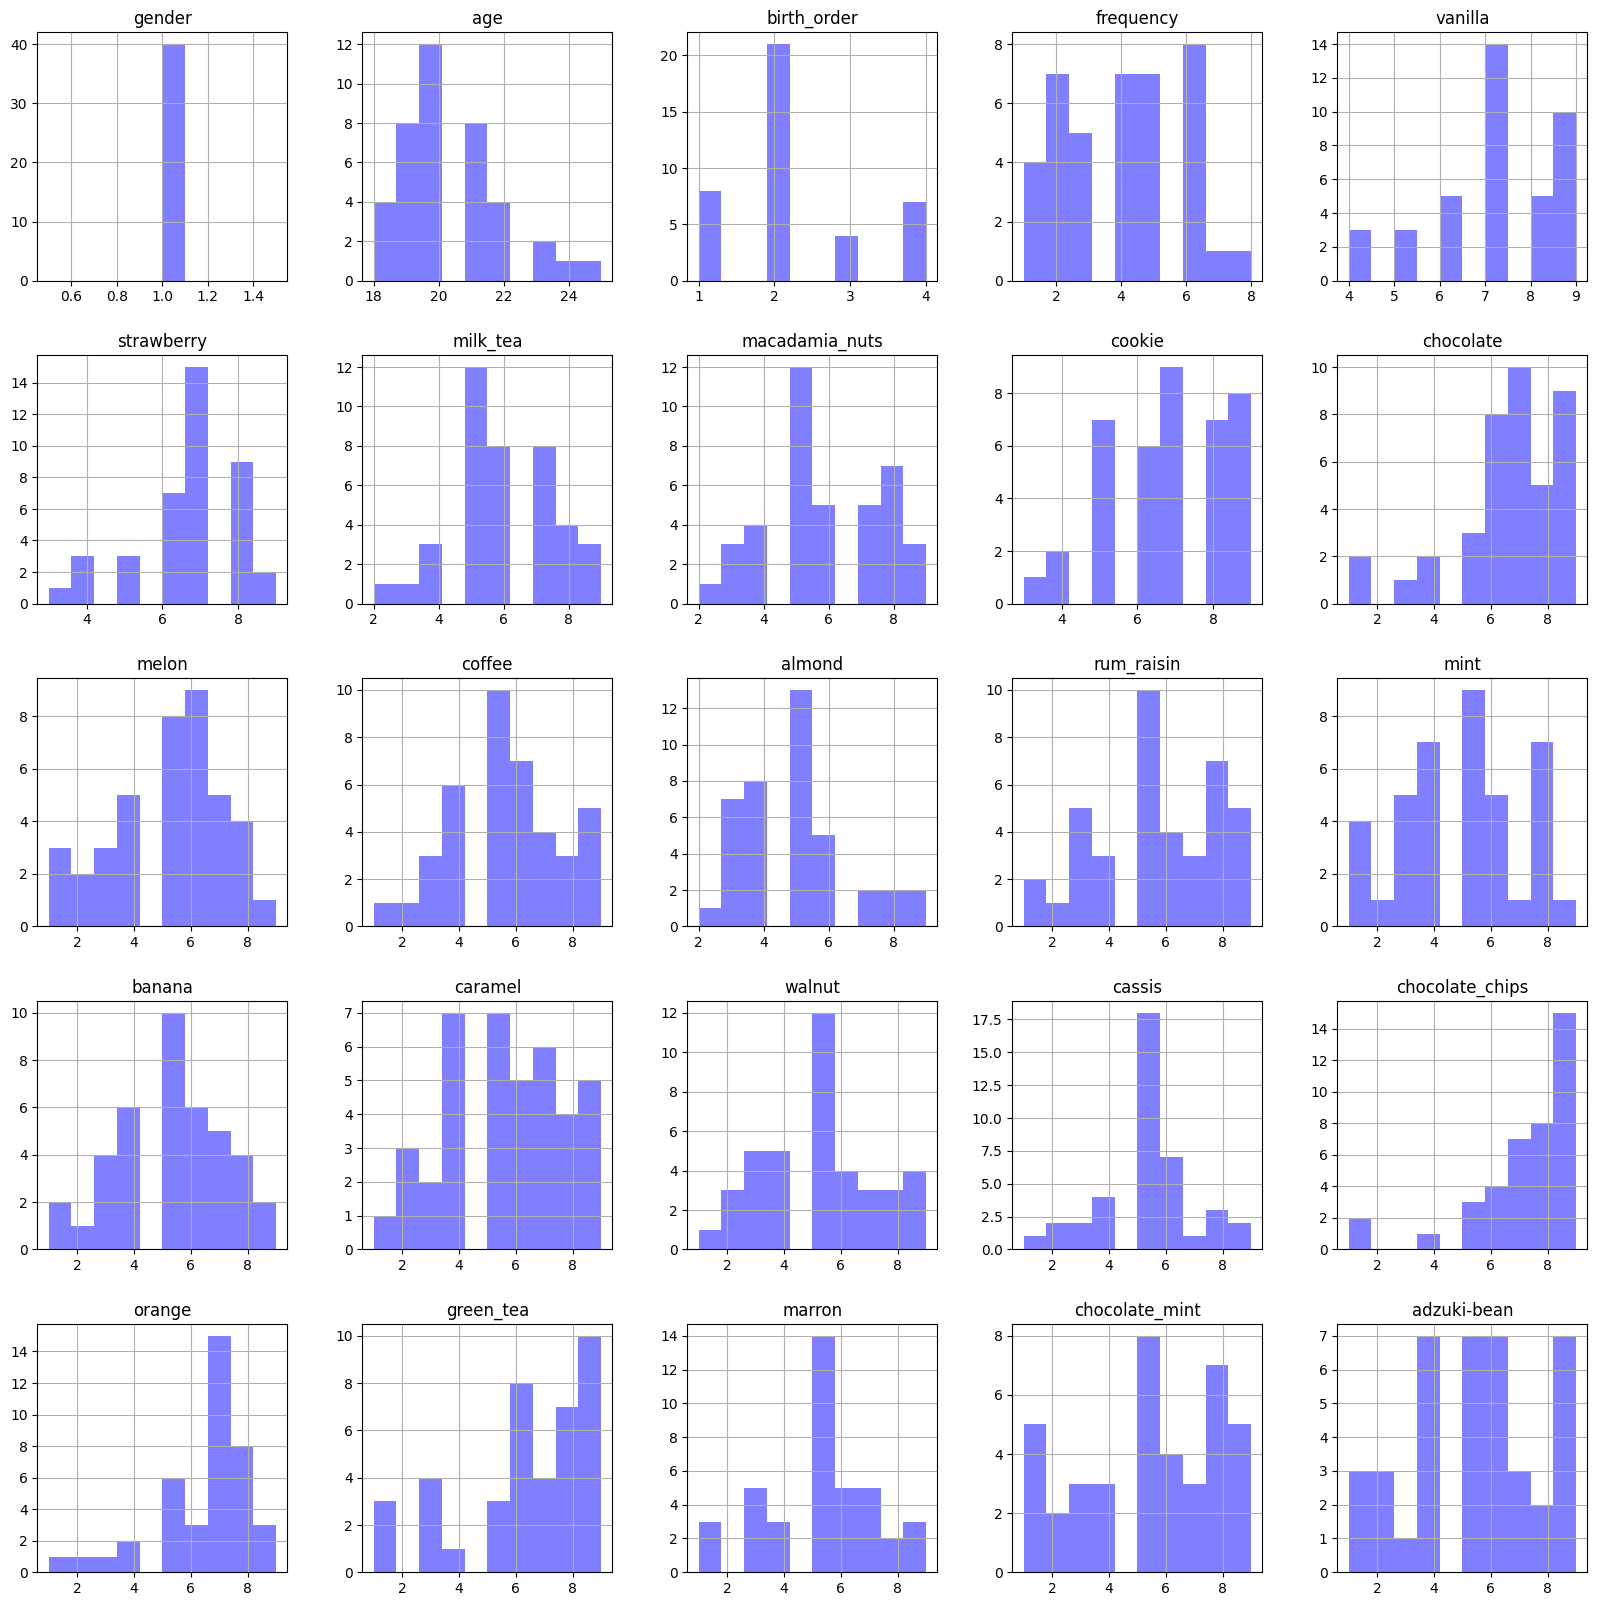

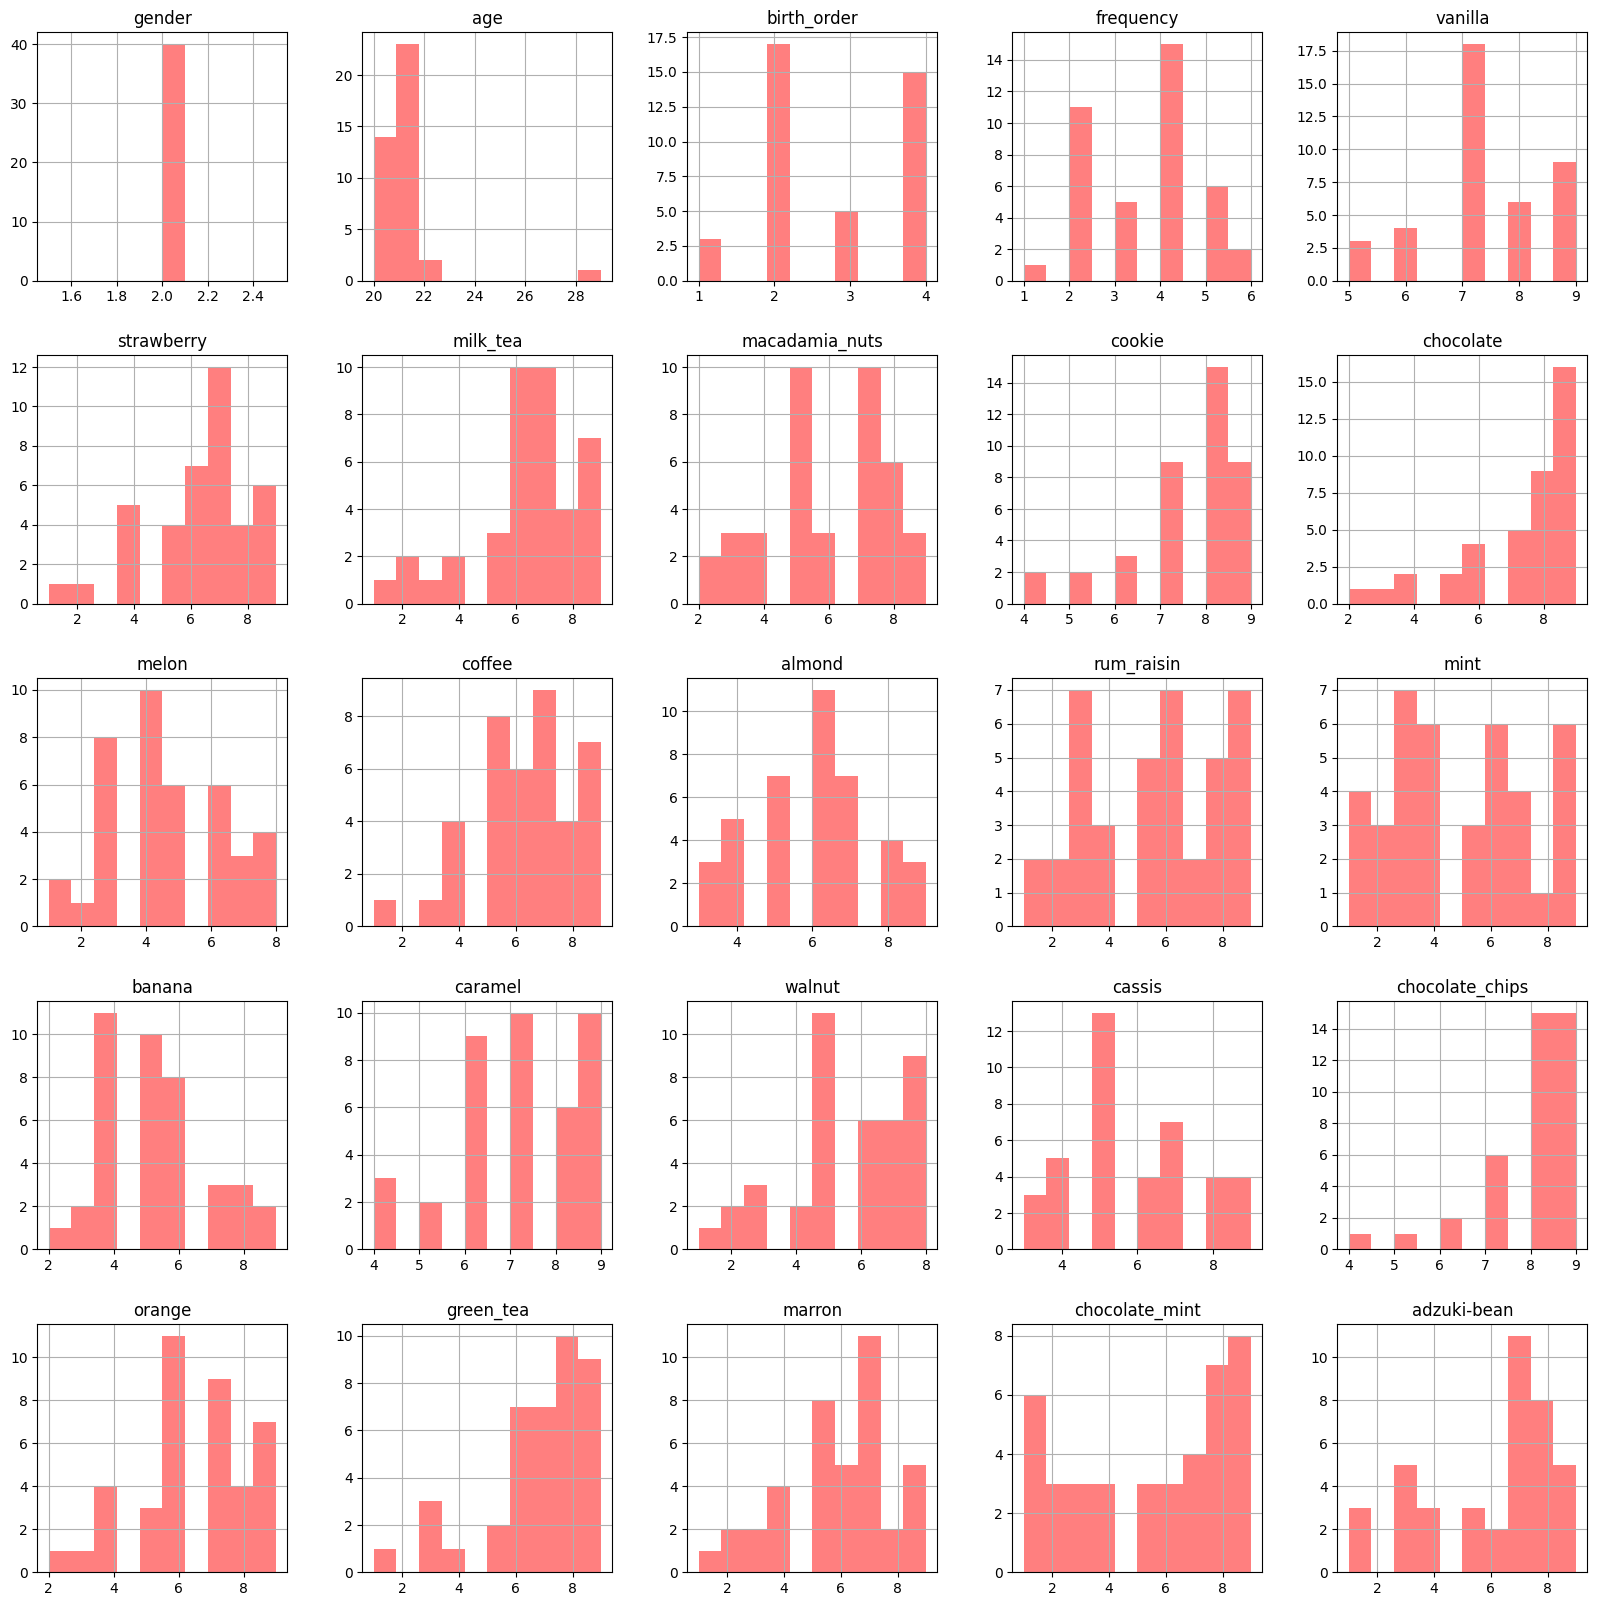

In [18]:
# Draw histgrams for each gender.

df[df['gender'] == 1].hist(figsize=(20,20), alpha=0.5, color='blue')
df[df['gender'] == 2].hist(figsize=(20,20), alpha=0.5, color='red')

In [168]:
# Decide colors for each pattern.

df['class'] = [0 if i == 1 else 1 for i in df['gender'].tolist()]
color_codes = {0:'#0000FF', 1:'#FF0000'}
colors = [color_codes[x] for x in df['class'].tolist()]
df.iloc[:,4:]

,vanilla,strawberry,milk_tea,macadamia_nuts,cookie,chocolate,melon,coffee,almond,rum_raisin,mint,banana,caramel,walnut,cassis,chocolate_chips,orange,green_tea,marron,chocolate_mint,adzuki-bean,class
ID,,,,,,,,,,,,,,,,,,,,,,
1,7,7,8,3,9,9,6,8,3,2,1,7,9,3,3,9,7,8,8,1,7,1
2,7,8,9,9,9,9,2,7,7,9,5,4,7,8,9,9,4,7,7,8,9,1
3,7,4,3,3,6,4,7,7,6,3,3,4,6,3,3,6,7,3,7,3,3,1
4,9,6,6,5,8,6,8,9,6,5,4,4,9,5,4,8,9,1,2,1,3,1
5,9,5,7,5,6,8,4,4,4,6,9,6,6,6,5,9,6,6,6,9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,5,6,4,9,6,7,4,3,6,5,4,5,5,5,5,7,7,4,4,4,4,0
77,7,5,6,6,8,9,4,4,4,5,4,3,9,5,5,9,7,6,5,6,7,0
78,4,8,8,9,9,9,4,8,9,1,9,6,8,9,5,9,9,9,4,9,9,0


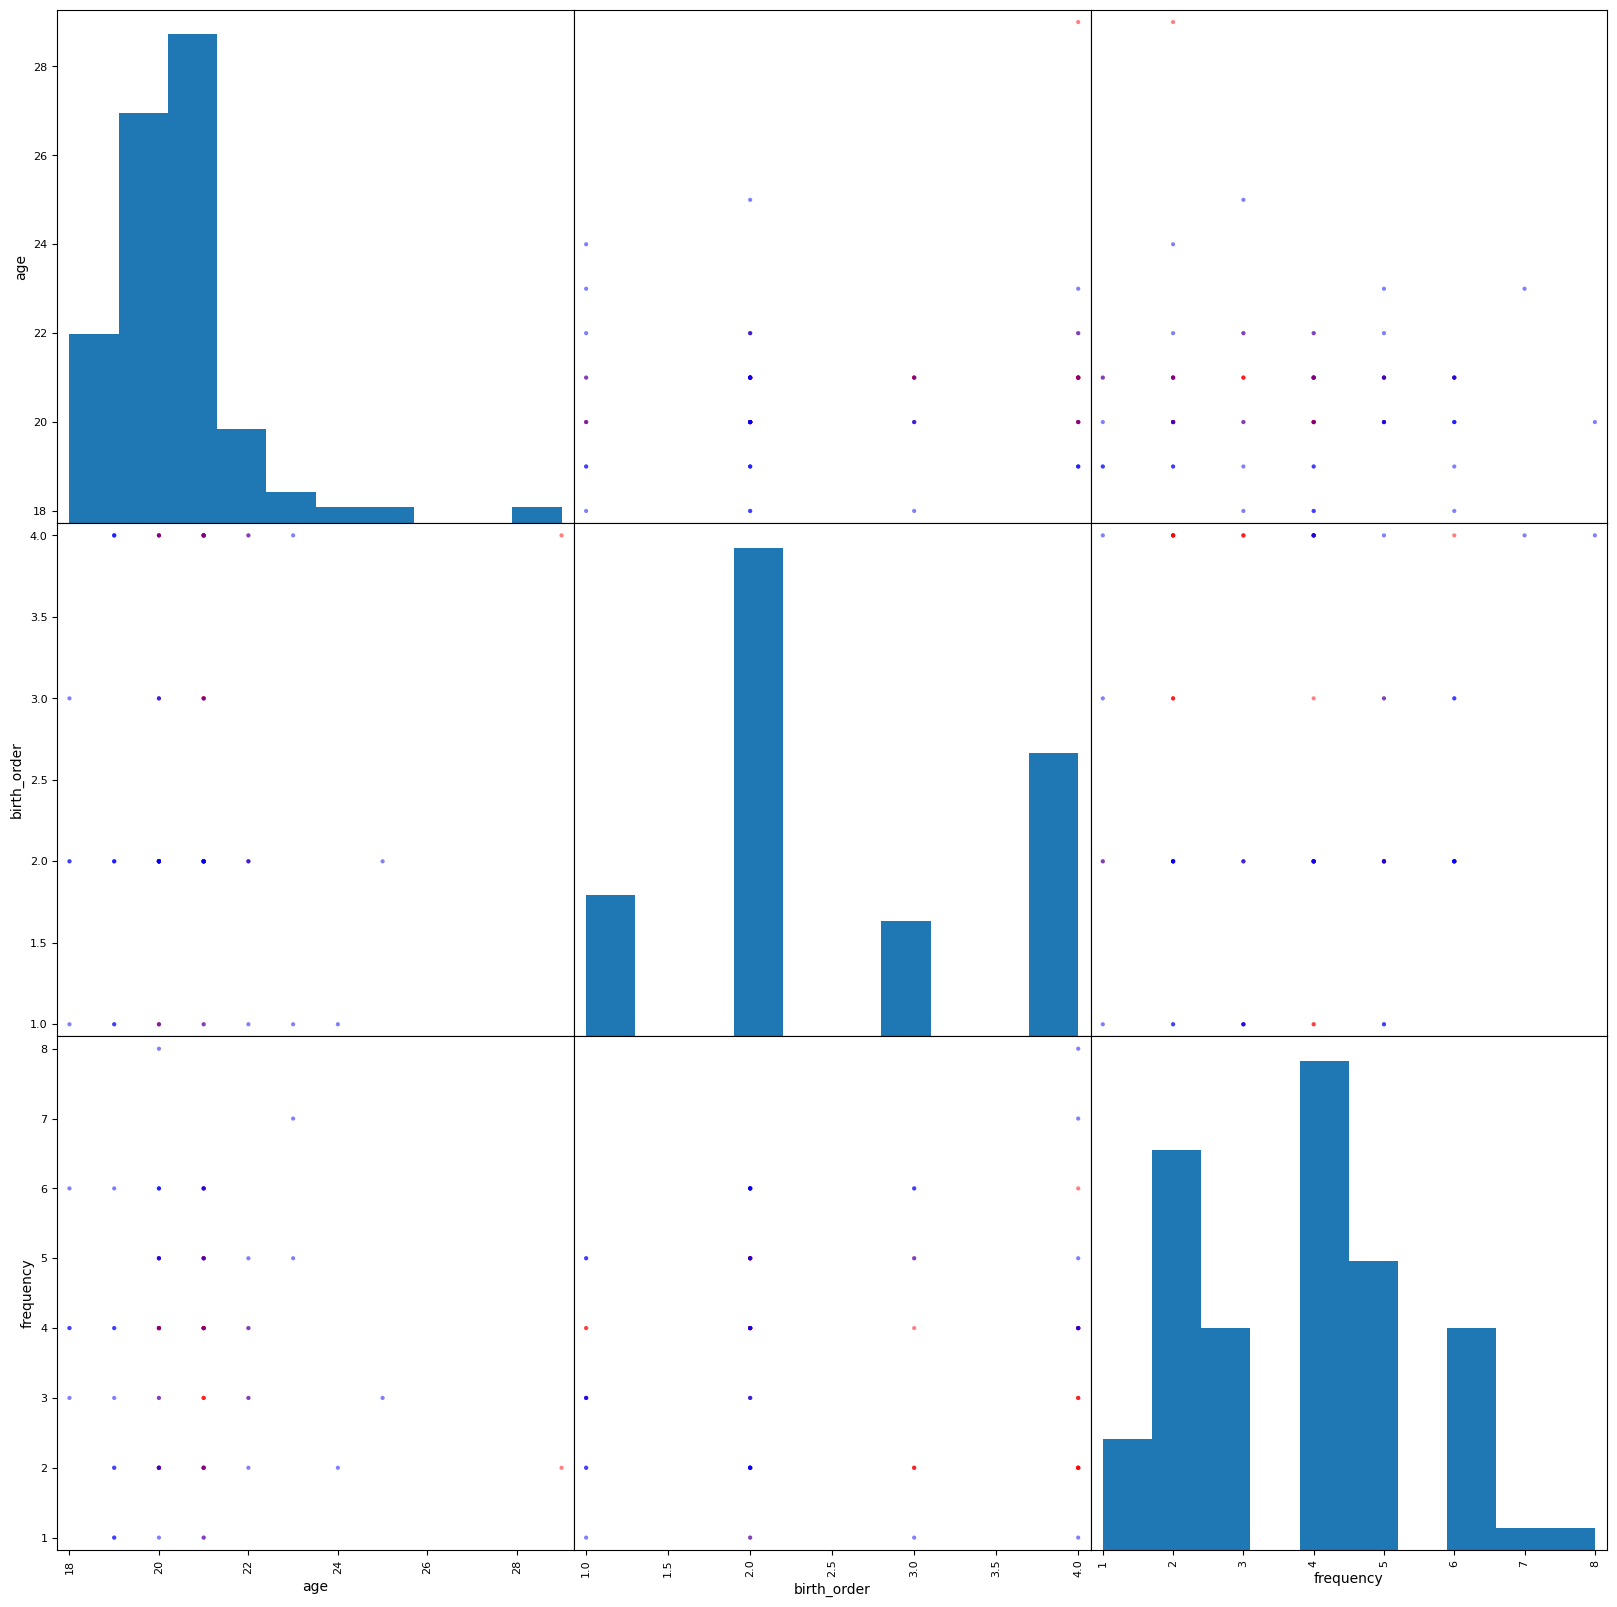

In [30]:
# Draw the scatter matrix.

# df.iloc[:,1:]

plotting.scatter_matrix(df.dropna(axis=1)[df.columns[1:4]], figsize=(20, 20), color=colors, alpha=0.5)
plt.show()

In [171]:
# Groups of libraries related to machine learning.

from sklearn.model_selection import train_test_split # Divide the training and test data.
from sklearn.metrics import confusion_matrix # Confusion matrix

from sklearn.decomposition import PCA # Principal Component Analysis
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.neighbors import KNeighborsClassifier # K neighbors Classifier method
from sklearn.svm import SVC # Support Vector Machine
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.ensemble import AdaBoostClassifier # AdaBoost
from sklearn.naive_bayes import GaussianNB # Naive bayes 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA # Linear Discriminant Analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA # Quadratic Discriminant Analysis

### Pricipal Component Analysiss (PCA)

In [204]:
# Standardization

std_sc = StandardScaler()
std_sc.fit(df.iloc[:, 4:25])
std_data = std_sc.transform(df.iloc[:, 4:25])
std_data_df = pd.DataFrame(std_data, columns=df.columns[4:25])
# display(std_data_df)

# Principal component analysis
n_components = 20
pca = PCA(n_components=n_components)
pca.fit(std_data_df)

# Mapping data into the Principal Component space.

pca_cor = pca.transform(std_data_df)

# pca.get_covariance()# Variance and Covariance matrix.

In [205]:
# Display the eigenvalue vector matrix.
eig_vec = pd.DataFrame(pca.components_.T, index=df.columns[4:25], \
    columns=["PC{}".format(x + 1) for x in range(n_components)])
display(eig_vec)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
vanilla,0.057998,0.218694,0.250208,0.204013,-0.313038,0.094490,-0.460982,0.104835,-0.121380,0.036910,-0.272788,0.530349,-0.061485,0.236309,-0.080096,0.085049,-0.119112,0.015339,0.076799,-0.214154
strawberry,-0.155748,0.120400,-0.060131,0.196458,0.221180,-0.458008,-0.241608,0.434850,0.023056,0.189629,-0.143104,-0.231270,-0.295157,0.118617,-0.048444,-0.387721,-0.061657,-0.142691,-0.116534,0.101809
milk_tea,-0.256600,0.118676,0.174907,0.275888,0.108008,0.259937,0.117731,0.116024,-0.016450,0.294942,-0.269526,-0.278980,0.375358,0.233390,0.278969,0.150859,-0.048303,0.383355,-0.087427,0.125412
macadamia_nuts,-0.293405,-0.135732,0.227267,-0.273458,0.170933,0.041558,-0.043624,0.042545,0.105408,0.030126,-0.313261,0.096498,0.357328,-0.081362,-0.150555,-0.256310,0.399612,-0.255818,0.365501,-0.049106
cookie,-0.226863,0.279651,0.096181,-0.372010,-0.197132,0.158064,-0.019212,0.028956,0.088614,0.062817,-0.073974,-0.087553,-0.218305,-0.285425,0.540577,-0.143721,-0.028941,-0.108684,-0.209980,-0.360687
chocolate,-0.234282,0.128995,-0.352577,-0.139238,-0.192374,-0.157715,-0.230809,-0.024352,0.252625,-0.035139,0.112190,-0.068284,0.429992,0.022230,-0.371670,-0.031638,-0.022120,0.241037,-0.332069,-0.305373
melon,-0.061221,0.262083,-0.292116,0.161303,0.329743,-0.165444,0.146293,0.261718,0.076394,-0.477216,-0.026683,0.335999,0.180277,-0.155643,0.314249,0.069584,-0.104551,0.108129,0.213276,-0.087836
coffee,-0.227341,0.144640,-0.048034,0.108687,0.118842,0.565440,-0.108974,-0.080041,0.109179,-0.459755,0.032047,0.004922,-0.124551,0.192864,-0.132029,-0.265090,0.018050,-0.178416,-0.271849,0.298522
almond,-0.260042,-0.103761,-0.058058,-0.429975,0.125213,0.061968,0.002160,0.144858,-0.286170,-0.180137,-0.000900,-0.100235,-0.386730,0.318892,-0.134000,0.140436,0.002681,0.433276,0.192765,-0.145411
rum_raisin,-0.065225,-0.239739,0.253542,0.057973,-0.082462,0.142481,-0.134955,0.633232,-0.227102,-0.097159,0.444221,0.009526,0.154089,-0.244763,-0.011097,0.122377,0.180455,-0.018240,-0.165726,-0.000928


In [206]:
# Eigenvalue
eig = pd.DataFrame(pca.explained_variance_, index=["PC{}".format(x + 1) for x in range(n_components)], columns=['固有値']).T
display(eig)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
固有値,4.564935,2.236998,2.05412,1.659825,1.410357,1.238871,1.088018,1.039478,0.853339,0.726841,0.695423,0.655419,0.592196,0.500748,0.456768,0.414801,0.32562,0.245493,0.210333,0.189969


In [207]:
# Standard deviation of PCA.
dv = np.sqrt(eig)
dv = dv.rename(index={"固有値":"主成分の標準偏差"})
display(dv)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
主成分の標準偏差,2.136571,1.49566,1.43322,1.288342,1.187584,1.113046,1.043081,1.019548,0.923763,0.85255,0.83392,0.80958,0.769543,0.707635,0.675846,0.644051,0.570631,0.495473,0.458621,0.435855


In [208]:
# Contribution rate
ev = pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(n_components)], columns=['寄与率']).T
display(ev)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
寄与率,0.214661,0.105192,0.096593,0.078051,0.06632,0.058256,0.051163,0.04888,0.040127,0.034179,0.032701,0.03082,0.027847,0.023547,0.021479,0.019506,0.015312,0.011544,0.009891,0.008933


In [209]:
# Culmulated contribution rate
t_ev = pd.DataFrame(pca.explained_variance_ratio_.cumsum(), index=["PC{}".format(x + 1) for x in range(n_components)], columns=['累積寄与率']).T
display (t_ev)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
累積寄与率,0.214661,0.319853,0.416445,0.494497,0.560817,0.619073,0.670236,0.719116,0.759244,0.793422,0.826124,0.856944,0.884791,0.908339,0.929818,0.949323,0.964635,0.976179,0.98607,0.995003


In [198]:
print('主成分得点')
cor = pd.DataFrame(pca_cor, columns=["PC{}".format(x + 1) for x in range(n_components)])
display(cor)

主成分得点


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.391193,3.956573,-0.191631,1.211855,-1.201427,-0.250220,0.345225,-1.317064,0.036986,-0.768246
1,-3.503905,-1.157817,1.641244,-1.256321,-0.477003,0.195544,-0.351223,0.963702,0.952380,1.386159
2,3.339902,1.083614,-0.651894,-0.286405,0.203073,0.552702,1.269156,-1.064832,-1.514751,-1.874083
3,1.274348,2.770678,-1.541360,-0.699748,1.090023,1.949606,-0.256039,0.750317,-2.231738,-0.469259
4,0.630513,-1.541999,-1.204443,1.072341,-1.860676,0.791314,-0.268648,0.352827,-0.101891,1.079327
...,...,...,...,...,...,...,...,...,...,...
75,1.486375,-0.752116,-0.508915,-1.890289,1.034586,-0.694194,0.790239,-0.041692,-0.049405,0.771514
76,0.151105,0.295549,-0.464146,-0.861172,-1.038235,-0.429569,-0.284177,-1.052969,-0.599908,0.768327
77,-4.039765,-1.209240,-1.893913,-1.651573,1.441320,-0.327183,-0.129482,-1.644370,-0.081193,-0.021309
78,0.385144,0.007098,-1.732236,3.058572,-0.212243,0.517032,0.350355,0.547343,-0.632664,-0.060988


### Machine learning

In [80]:
# Devide data

dfs = df.apply(lambda x: (x-x.mean())/x.std(), axis=0).fillna(0) # Visualize the data

X = dfs.iloc[:, 4:25] # Explanatory variable
y = df.iloc[:, 25] # Object variable
X

,vanilla,strawberry,milk_tea,macadamia_nuts,cookie,chocolate,melon,coffee,almond,rum_raisin,mint,banana,caramel,walnut,cassis,chocolate_chips,orange,green_tea,marron,chocolate_mint,adzuki-bean
ID,,,,,,,,,,,,,,,,,,,,,
1,-0.176843,0.285975,0.986901,-1.568505,1.201122,0.976997,0.557702,1.017604,-1.430286,-1.527790,-1.654044,0.942899,1.309485,-1.205746,-1.450150,0.811890,0.293979,0.605890,1.201419,-1.621162,0.518582
2,-0.176843,0.888029,1.535179,1.662750,1.201122,0.976997,-1.493615,0.511962,0.904875,1.422425,0.042411,-0.721040,0.316511,1.280328,1.978776,0.811890,-1.385899,0.157082,0.713533,0.914734,1.348313
3,-0.176843,-1.520185,-1.754490,-1.568505,-0.759894,-1.544286,1.070531,0.511962,0.321085,-1.106330,-0.805816,-0.721040,-0.179977,-1.205746,-1.450150,-0.975758,0.293979,-1.638146,0.713533,-0.896620,-1.140880
4,1.312364,-0.316078,-0.109656,-0.491420,0.547450,-0.535773,1.583360,1.523246,0.321085,-0.263412,-0.381702,-0.721040,1.309485,-0.211316,-0.878662,0.216007,1.413897,-2.535760,-1.725896,-1.621162,-1.140880
5,1.312364,-0.918132,0.438622,-0.491420,-0.759894,0.472741,-0.467957,-1.004963,-0.846496,0.158047,1.738866,0.388252,-0.179977,0.285899,-0.307175,0.811890,-0.265981,-0.291725,0.225647,1.277005,-1.970611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,-1.666051,-0.316078,-1.206212,1.662750,-0.759894,-0.031516,-0.467957,-1.510605,0.321085,-0.263412,-0.381702,-0.166394,-0.676464,-0.211316,-0.307175,-0.379875,0.293979,-1.189339,-0.750124,-0.534349,-0.726014
77,-0.176843,-0.918132,-0.109656,0.047122,0.547450,0.976997,-0.467957,-1.004963,-0.846496,-0.263412,-0.381702,-1.275686,1.309485,-0.211316,-0.307175,0.811890,0.293979,-0.291725,-0.262239,0.190192,0.518582
78,-2.410654,0.888029,0.986901,1.662750,1.201122,0.976997,-0.467957,1.017604,2.072455,-1.949249,1.738866,0.388252,0.812998,1.777543,-0.307175,0.811890,1.413897,1.054697,-0.750124,1.277005,1.348313


In [121]:
# Divide the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

### Logistic Regression.

In [122]:
clf =  LogisticRegression() # Create models
clf.fit(X_train, y_train) # training

# The accuracy rate (train) : confirm the accuracy rate for training data.
clf.score(X_train, y_train)


0.9583333333333334

In [123]:
# The accuracy rate (test)
clf.score(X_test, y_test)

0.53125

In [124]:
y_predict = clf.predict(X_test)
pd.DataFrame(y_predict).T

# Confusion matrix

pd.DataFrame(confusion_matrix(y_predict, y_test), index=['predicted 0', 'predicted 1'], columns=['real 0', 'real 1'])

,real 0,real 1
predicted 0,7,6
predicted 1,9,10


### Try several stastical methods

In [87]:

names = ["Logistic Regression", "Nearest Neighbors",
         "Linear SVM", "Polynomial SVM", "RBF SVM", "Sigmoid SVM", 
         "Decision Tree","Random Forest", "AdaBoost", "Naive Bayes", 
         "Linear Discriminant Analysis","Quadratic Discriminant Analysis"]

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    SVC(kernel="poly"),
    SVC(kernel="rbf"),
    SVC(kernel="sigmoid"),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    LDA(),
    QDA()]


In [99]:
# Calculate the accuracy rate when the creation of data is occurred several times.

result = []

# Repeat 100 times.

for trial in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score1 = clf.score(X_train, y_train)
        score2 = clf.score(X_test, y_test)
        result.append([name, score1, score2])

# Show results.

df_result = pd.DataFrame(result, columns=['classifier', 'train', 'test'])

/Users/maekawanaoki/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/maekawanaoki/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/maekawanaoki/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/maekawanaoki/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME alg

In [100]:
# Calculate the mean of the rate of correct answer for each classifier by grouping, then sort the accuracy rate for test data.

df_result_mean = df_result.groupby('classifier').mean().sort_values('test', ascending=False)
df_result_mean

,train,test
classifier,,
Sigmoid SVM,0.718333,0.582500
Decision Tree,1.000000,0.578750
Random Forest,1.000000,0.571250
Naive Bayes,0.765625,0.570937
AdaBoost,1.000000,0.567187
Linear Discriminant Analysis,0.861250,0.566562
Logistic Regression,0.871042,0.560937
Linear SVM,0.886042,0.556562
Nearest Neighbors,0.678958,0.544687


In [101]:
errors = df_result.groupby('classifier').std().sort_values('test', ascending=False)
errors

,train,test
classifier,,
Linear Discriminant Analysis,0.045703,0.088684
Decision Tree,0.000000,0.088219
AdaBoost,0.000000,0.083732
Logistic Regression,0.046130,0.083259
Sigmoid SVM,0.054317,0.081359
Linear SVM,0.040865,0.077659
Random Forest,0.000000,0.077454
RBF SVM,0.037881,0.076965
Naive Bayes,0.040856,0.076399


Text(0, 0.5, 'accuracy')

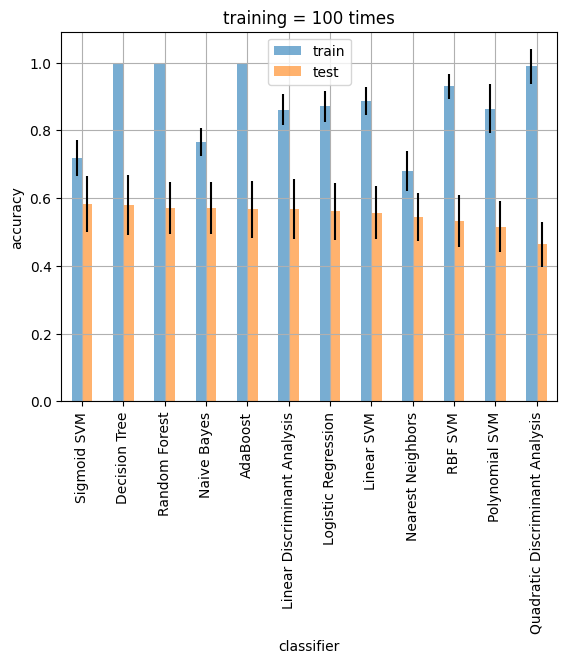

In [102]:
# Draw the bar graphs with the mean and the standard deviations.

df_result_mean.plot(kind='bar', alpha=0.6, grid=True, yerr=errors)
plt.title('training = 100 times')
plt.ylabel('accuracy')

In [110]:
# Calculate the accuracy rate when the creation of data is occurred several times.

result_re = []

# Repeat 100 times.

for trial in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score1 = clf.score(X_train, y_train)
        score2 = clf.score(X_test, y_test)
        result_re.append([name, score1, score2])

# Show results.

df_result_re = pd.DataFrame(result_re, columns=['classifier', 'train', 'test'])

/Users/maekawanaoki/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/maekawanaoki/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/maekawanaoki/anaconda3/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/maekawanaoki/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/maekawanaoki/anaconda3/lib/

In [113]:
# Calculate the mean of the rate of correct answer for each classifier by grouping, then sort the accuracy rate for test data.

df_result_mean_re = df_result_re.groupby('classifier').mean().sort_values('test', ascending=False)
df_result_mean_re

,train,test
classifier,,
Decision Tree,1.000000,0.596875
Random Forest,1.000000,0.593750
AdaBoost,1.000000,0.590625
Naive Bayes,0.779167,0.587500
Linear Discriminant Analysis,0.889583,0.568750
Sigmoid SVM,0.712500,0.568750
Logistic Regression,0.881250,0.550000
RBF SVM,0.937500,0.550000
Linear SVM,0.897917,0.540625


In [114]:
errors = df_result_re.groupby('classifier').std().sort_values('test', ascending=False)
errors

,train,test
classifier,,
Sigmoid SVM,0.058762,0.116741
Random Forest,0.000000,0.104167
Naive Bayes,0.046273,0.099696
AdaBoost,0.000000,0.093692
Decision Tree,0.000000,0.088939
RBF SVM,0.029463,0.088634
Linear SVM,0.041025,0.088450
Quadratic Discriminant Analysis,0.046117,0.079672
Logistic Regression,0.040552,0.076830


Text(0, 0.5, 'accuracy')

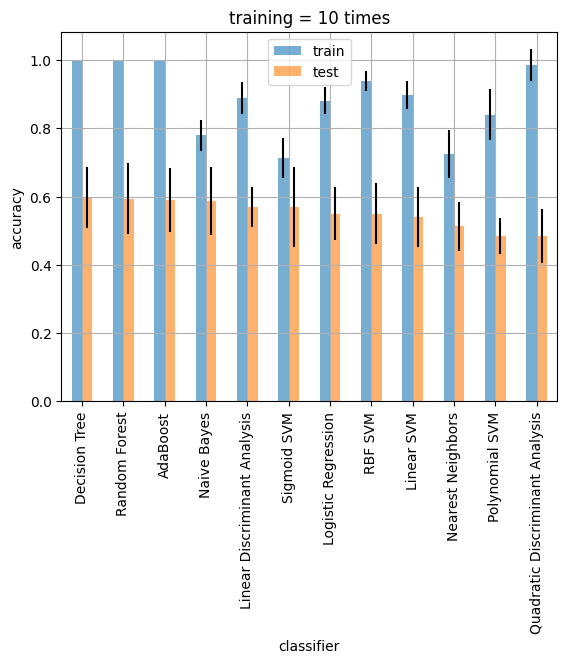

In [116]:
# Draw the bar graphs with the mean and the standard deviations.

df_result_mean_re.plot(kind='bar', alpha=0.6, grid=True, yerr=errors)
plt.title('training = 10 times')
plt.ylabel('accuracy')

### Factor Analysis (FA)

In [159]:
# Import sklearn's standardization modules.

from sklearn.preprocessing import StandardScaler

# Create hte schemes to translate data.

sc = StandardScaler()
sc.fit(X)

z = sc.transform(X)

# Import the sklearn FactorAnalysis class.

from sklearn.decomposition import FactorAnalysis as FA

# Decide the number of components.

n_components = 4

# Execute the factor analysis.

fa = FA(n_components, max_iter=5000)
fitted = fa.fit_transform(z)

fitted = pd.DataFrame(fitted, 
                      columns=['First factor', 'Second factor', 'Third factor', 'Fourth factor'],
                      index=[X.index]
                      )
fitted

,First factor,Second factor,Third factor,Fourth factor
ID,,,,
1,1.217716,1.407529,-1.368752,1.588748
2,-1.065413,1.127349,0.812507,-0.501063
3,1.343458,-0.808982,-0.403411,-0.041103
4,0.979528,0.459395,-0.820376,-0.420700
5,-1.228279,-0.969828,-0.791125,0.213190
...,...,...,...,...
76,0.484151,-0.183548,0.328929,-1.308287
77,-0.049732,0.348639,-0.722132,-0.435830
78,-1.964589,0.659388,0.580031,-0.965277


In [160]:
Factor_loading_matrix = fa.components_.T

# Translate the dataframe.

Factor_loading_matrix = pd.DataFrame(Factor_loading_matrix,
                                     columns=['First factor', 'Second factor', 'Third factor', 'Fourth factor'],
                                     index=[X.columns]).sort_values('First factor')
Factor_loading_matrix

,First factor,Second factor,Third factor,Fourth factor
chocolate_mint,-0.853207,-0.336030,-0.021680,-0.023291
mint,-0.814625,-0.418640,0.007525,0.055338
chocolate_chips,-0.473316,0.497866,-0.580957,-0.077399
walnut,-0.433330,0.406452,0.493364,-0.281060
chocolate,-0.398033,0.449805,-0.376347,-0.115159
almond,-0.380602,0.383921,0.196561,-0.355607
caramel,-0.358390,0.447915,0.018919,0.292742
macadamia_nuts,-0.339709,0.429176,0.536887,-0.203557
cassis,-0.298095,0.247876,0.240142,0.156780
green_tea,-0.296764,0.102615,0.373694,0.225986


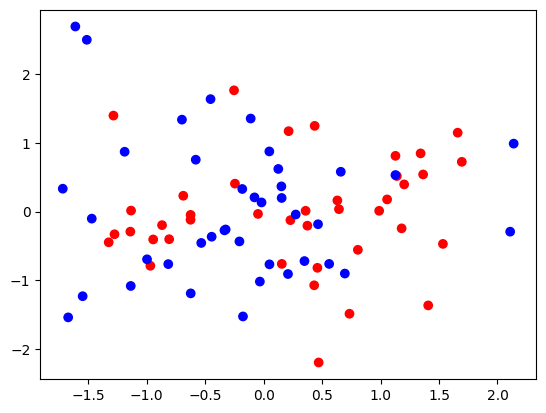

In [163]:
plt.scatter(fitted.iloc[:,1], fitted.iloc[:,2], color=colors)